## Instalando e carregando as bibliotecas

In [ ]:
!pip install yfinance prophet

In [6]:
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly

## Carregando os dados históricos

In [16]:
ticker = input("Digite o código da ação desejada: ")
dados = yf.Ticker(ticker).history("2y")

Digite o código da ação desejada: BTC-USD


## Gráfico da variação do período histórico

<Axes: xlabel='Date'>

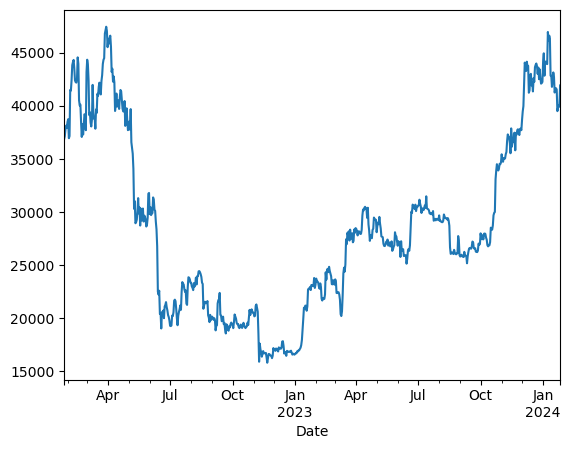

In [20]:
dados.Close.plot()


## Preparando os dados de treinamento

In [26]:
# resetando o índice do DataFrame
treinamento = dados.reset_index()

In [27]:
# retirando o timezone (fuso horário) da coluna de data
treinamento["Date"] = treinamento["Date"].dt.tz_localize(None)

In [28]:
# selecionando as colunas de data e valor de fechamento
treinamento = treinamento[['Date', 'Close']]

In [30]:
# renomeando as colunas (o Prophet precisa receber os dados com esse padrão)
treinamento.columns = ['ds', 'y']

## Treinando o modelo

In [36]:
# criando o modelo
modelo = Prophet()
# treinando o modelo com os dados de treinamento
modelo.fit(treinamento)
# especificando o período das previsões (em dias)
periodo = modelo.make_future_dataframe(periods=90)
# gerando as previsões
previsoes = modelo.predict(periodo)

18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing


## Gerando o gráfico de previsões

In [39]:
plot_plotly(modelo, previsoes, xlabel = "período", ylabel="valor")